### 06.09 실습 내용

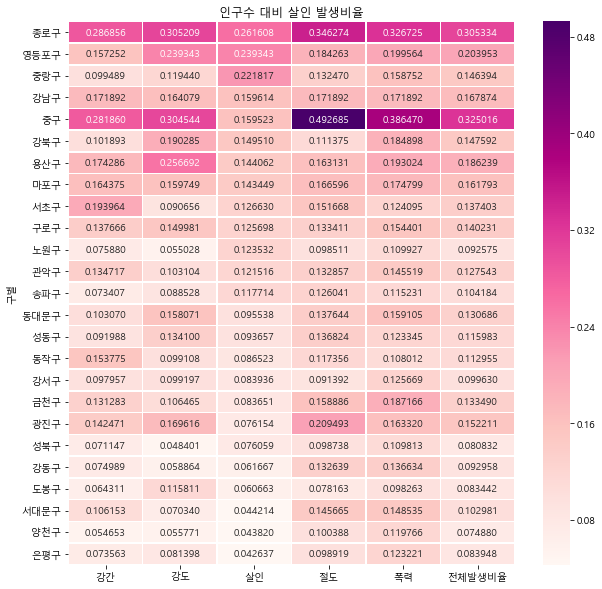

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # rc == run configure(configuration file)

%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() # 여백 X 한글 X
rc('font', family=font_name) # run configure


df = pd.read_excel('관서별 5대범죄 발생 및 검거.xlsx', encoding='utf-8') # 엑셀 파일 읽기?


police_to_gu = {'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}

df['구별'] = df['관서명'].apply(lambda x : police_to_gu.get(x, '구 없음')) # 적용하다? 

gu_df = pd.pivot_table(df, index='구별', aggfunc=np.sum) # 피봇 테이블을 만드려면?

gu_df = gu_df.drop(['구 없음'])


gu_df['강간검거율'] = gu_df['강간(검거)']/gu_df['강간(발생)']*100
gu_df['강도검거율'] = gu_df['강도(검거)']/gu_df['강도(발생)']*100
gu_df['살인검거율'] = gu_df['살인(검거)']/gu_df['살인(발생)']*100
gu_df['절도검거율'] = gu_df['절도(검거)']/gu_df['절도(발생)']*100
gu_df['폭력검거율'] = gu_df['폭력(검거)']/gu_df['폭력(발생)']*100
gu_df['검거율'] = gu_df['소계(검거)']/gu_df['소계(발생)']*100

del gu_df['강간(검거)']
del gu_df['강도(검거)']
del gu_df['살인(검거)']
del gu_df['절도(검거)']
del gu_df['폭력(검거)']
del gu_df['소계(발생)']
del gu_df['소계(검거)']

            
gu_df[ gu_df[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100 ] = 100


gu_df.rename(columns = {'강간(발생)':'강간',
                        '강도(발생)':'강도',
                        '살인(발생)':'살인',
                        '절도(발생)':'절도',
                        '폭력(발생)':'폭력'}, inplace=True) # inplace 옵션 == 덮어쓰기 여부


popul_df = pd.read_csv('pop_kor.csv', encoding='UTF-8', index_col='구별')

gu_df = gu_df.join(popul_df) 


weight_col = gu_df[['강간', '강도', '살인', '절도', '폭력']].max()

crime_count_norm = gu_df[['강간', '강도', '살인', '절도', '폭력']] / weight_col


crime_ratio = crime_count_norm.div(gu_df['인구수'], axis=0) * 100000 

crime_ratio['전체발생비율'] = crime_ratio.mean(axis=1) 


plt.figure(figsize = (10,10))

sns.heatmap(crime_ratio.sort_values(by='살인', ascending=False), 
            annot=True, fmt='f', linewidths=.5, cmap='RdPu')

plt.title('인구수 대비 살인 발생비율')
plt.show()

---

### 06.10 실습

### json 라이브러리와 geo 정보

In [9]:
import json 

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, 'r', encoding = 'utf-8'))

In [10]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [11]:
geo_str['features'][0]

{'type': 'Feature',
 'id': '강동구',
 'properties': {'code': '11250',
  'name': '강동구',
  'name_eng': 'Gangdong-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.11519584981606, 37.557533180704915],
    [127.16683184366129, 37.57672487388627],
    [127.18408792330152, 37.55814280369575],
    [127.16530984307447, 37.54221851258693],
    [127.14672806823502, 37.51415680680291],
    [127.12123165719615, 37.52528270089],
    [127.1116764203608, 37.540669955324965],
    [127.11519584981606, 37.557533180704915]]]}}

#### pyprnt

In [8]:
from pyprnt import prnt

prnt(geo_str['features'][0])

┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│type      │Feature                                                                                                    │
│id        │강동구                                                                                                        │
│properties│┌─────────┬───────────┐                                                                                    │
│          ││code     │11250      │                                                                                    │
│          ││name     │강동구        │                                                                                    │
│          ││name_eng │Gangdong-gu│                                                                                    │
│          ││base_year│2013       │                                                                                    │
│          │└─────────┴─────────

In [14]:
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,595691
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031


---

### 구별 살인사건 발생 건수 지도 시각화

지도 라이브러리

In [5]:
import folium

map_SEOUL = folium.Map(location=[37.5502, 126.982], zoom_start=11) 
map_SEOUL

In [10]:
# 구 별 살인 발생건수
gu_df['살인'].head()

구별
강남구    13
강동구     4
강북구     7
강서구     7
관악구     9
Name: 살인, dtype: int64

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str, # 지도 데이터
               data = gu_df['살인'], # 시각화할 데이터
               columns = [gu_df.index, gu_df['살인']], # 인덱스와 데이터
               fill_color = 'PuRd', # 색상
               key_on = 'feature.id') # 고정

map

#### [인구 수 대비] [5대 범죄 발생 수치 평균] 기준 구별 데이터 시각화

인구 수 대비 발생 건수 비율

In [12]:
crime_ratio.head()

,강간,강도,살인,절도,폭력,전체발생비율
구별,,,,,,
강남구,0.171892,0.164079,0.159614,0.171892,0.171892,0.167874
강동구,0.074989,0.058864,0.061667,0.132639,0.136634,0.092958
강북구,0.101893,0.190285,0.149510,0.111375,0.184898,0.147592
강서구,0.097957,0.099197,0.083936,0.091392,0.125669,0.099630
관악구,0.134717,0.103104,0.121516,0.132857,0.145519,0.127543


In [13]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,               
               data = crime_ratio['전체발생비율'],
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'BuGn', 
               key_on = 'feature.id')
map

#### 구별 검거율 데이터 시각화

In [14]:
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,595691
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031


In [15]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data= geo_str,
               data = gu_df['검거율'],
               columns = [gu_df.index, gu_df['검거율']],
               fill_color = 'YlGnBu', 
               key_on = 'feature.id')
map

---

<br>

### 경찰서 위치 데이터 및 경찰서별 검거율

#### 경찰서별 검거율 계산하기

In [16]:
df.head() # 관서명->구별 합계 전

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356,구 없음
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794,중구
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711,서대문구


In [17]:
df = df.drop([0]) # "계" 삭제

경찰서명 full name으로 변경 -> 구글맵스에서 좌표를 얻기 위해

ex) 중부서 -> 서울중부경찰서

크롤링도 가능

In [23]:
station_name = []

for name in df['관서명']:
    station_name.append('서울' + name[:-1] + '경찰서') # 서울 + 중부 + 경찰서

print(station_name)

['서울경찰서', '서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


In [24]:
df['경찰서'] = station_name # 경찰서 열 추가
df['검거율'] = df['소계(검거)'] / df['소계(발생)'] * 100 # 검거율 추가
df['검거율'].head(10)

0    65.410875
1    60.000000
2    64.279935
3    58.548233
4    64.010921
5    60.635916
6    65.000000
7    66.964685
8    67.902542
9    61.445166
Name: 검거율, dtype: float64

#### 경찰서별 검거율 점수 계산하기 (정규화)

newX = (oldX - min(x)) / max(x) - min(x)

-> min(x) = 0 ~ man(x) = 1

In [25]:
def reRange(x, oldMin, oldMax, newMin, newMax):
    return (x - oldMin) * (newMax - newMin) / (oldMax - oldMin) + newMin

df['점수'] = reRange(df['검거율'], min(df['검거율']), max(df['검거율']), 1, 100)
# 1에서 100 사이 점수로 바꿈

df[['관서명', '경찰서', '검거율', '점수']].head()

,관서명,경찰서,검거율,점수
0,계,서울경찰서,65.410875,42.871108
1,중부서,서울중부경찰서,60.000000,10.709938
2,종로서,서울종로경찰서,64.279935,36.149027
3,남대문서,서울남대문경찰서,58.548233,2.080923
4,서대문서,서울서대문경찰서,64.010921,34.550058


In [26]:
# 점수 기준 내림차순, 덮어쓰기 허용
df.sort_values(by = '점수', ascending = False, inplace = True)
df[['관서명', '경찰서', '검거율', '점수']].head()

,관서명,경찰서,검거율,점수
20,강서서,서울강서경찰서,75.022381,100.000000
16,금천서,서울금천경찰서,73.948691,93.618196
15,강북서,서울강북경찰서,73.126615,88.731940
30,도봉서,서울도봉경찰서,71.321321,78.001632
31,수서서,서울수서경찰서,69.003798,64.226731


In [27]:
df[['관서명', '경찰서', '검거율', '점수']].tail()

,관서명,경찰서,검거율,점수
1,중부서,서울중부경찰서,60.000000,10.709938
12,동작서,서울동작경찰서,58.836524,3.794469
3,남대문서,서울남대문경찰서,58.548233,2.080923
19,관악서,서울관악경찰서,58.502758,1.810629
28,방배서,서울방배경찰서,58.366376,1.000000


In [15]:
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356,구 없음
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794,중구
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711,서대문구


---

### Google Maps Geocoding Api

#### 구글맵스 api 이용하여 경찰서 좌표 데이터(위, 경도) 받아오기

In [17]:
import googlemaps
gmaps = googlemaps.Client(key={api_key}) # -- input your key --

tmpMap = gmaps.geocode('서울강남경찰서', language="ko")
tmpMap

[{'address_components': [{'long_name': '１１',
    'short_name': '１１',
    'types': ['premise']},
   {'long_name': '테헤란로114길',
    'short_name': '테헤란로114길',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '대치동',
    'short_name': '대치동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '강남구',
    'short_name': '강남구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '06175', 'short_name': '06175', 'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 강남구 대치동 테헤란로114길 11',
  'geometry': {'location': {'lat': 37.5094352, 'lng': 127.0669578},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5107841802915,
     'lng': 127.0683067802915},
    'southwest': {'lat':

In [21]:
tmpMap[0].get('geometry')['location']

{'lat': 37.5094352, 'lng': 127.0669578}

In [28]:
print(df['경찰서'])

20     서울강서경찰서
16     서울금천경찰서
15     서울강북경찰서
30     서울도봉경찰서
31     서울수서경찰서
8     서울동대문경찰서
7      서울성북경찰서
14     서울서부경찰서
29     서울은평경찰서
17     서울중랑경찰서
0        서울경찰서
6      서울용산경찰서
18     서울강남경찰서
24     서울서초경찰서
2      서울종로경찰서
22     서울종암경찰서
4     서울서대문경찰서
27     서울노원경찰서
11     서울성동경찰서
13     서울광진경찰서
25     서울양천경찰서
23     서울구로경찰서
9      서울마포경찰서
26     서울송파경찰서
5      서울혜화경찰서
10    서울영등포경찰서
21     서울강동경찰서
1      서울중부경찰서
12     서울동작경찰서
3     서울남대문경찰서
19     서울관악경찰서
28     서울방배경찰서
Name: 경찰서, dtype: object


In [30]:
lat = [] # 위도
lng = []  # 경도

for name in df['경찰서']:
    tmpMap = gmaps.geocode(name)
    
    tmpLoc = tmpMap[0].get('geometry')
    lat.append(tmpLoc['location']['lat'])
    lng.append(tmpLoc['location']['lng'])
    
df['위도'] = lat
df['경도'] = lng

df[['관서명', '경찰서', '검거율', '점수', '위도', '경도']].head()

,관서명,경찰서,검거율,점수,위도,경도
20,강서서,서울강서경찰서,75.022381,100.000000,37.551246,126.849963
16,금천서,서울금천경찰서,73.948691,93.618196,37.456872,126.897043
15,강북서,서울강북경찰서,73.126615,88.731940,37.637304,127.027340
30,도봉서,서울도봉경찰서,71.321321,78.001632,37.653359,127.052682
31,수서서,서울수서경찰서,69.003798,64.226731,37.493490,127.077212


셀 조회

In [36]:
df['lat'][20]
df.loc[20]['lat']
df.at[20, 'lat']

37.5512463

#### 경찰서별 검거율 데이터 시각화

In [37]:
df.index

Int64Index([20, 16, 15, 30, 31,  8,  7, 14, 29, 17,  6, 18, 24,  2, 22,  4, 27,
            11, 13, 25, 23,  9, 26,  5, 10, 21,  1, 12,  3, 19, 28],
           dtype='int64')

검거율

In [40]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df.index:
    
    folium.CircleMarker ([df['lat'][n], df['lng'][n]], 
                         radius = df['검거율'][n] * 0.5, # circle 크기 조절
                         color = '#3186cc', fill = True, fill_color = '#3186cc').add_to(map)

map

검거율 -> 점수

In [39]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df.index: 
    
    folium.CircleMarker([df['lat'][n], df['lng'][n]], 
                         radius = df['점수'][n] * 0.5, # circle 크기 조절
                         color = '#3186cc', fill = True, fill_color = '#3186cc').add_to(map)

map

#### 경찰서별 검거율 데이터 & 인구 수 대비 5대 범죄 발생 평균 기준 구별 데이터 시각화

In [41]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_ratio['전체발생비율'],
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in df.index:
    folium.CircleMarker([df['lat'][n], df['lng'][n]], 
                        radius = df['점수'][n] * 0.7, # 0.5 -> 0.7
                        color = '#3186cc', fill = True, fill_color = '#3186cc').add_to(map)
    
map

In [43]:
# 구, 경찰서명, 검거율, 점수, 위 경도 정보 추가된 데이터 엑셀로 저장
df.to_excel('서울시 범죄현황 시각화 자료.xlsx', encoding = 'utf-8')

# csv파일로 저장
df.to_csv('서울시 범죄현황 시각화 자료.csv', encoding = 'euc-kr') # utf-8, cp949

In [ ]:
# 지도 html 문서로 저장
map.save('folium_map.html')